In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
tracks = pd.read_csv('drive/My Drive/DataSets/fma/tracks.csv',index_col=0, header=[0, 1])

In [ ]:
tracks.head()

album                       ... track                 
         comments         date_created  ...  tags            title
track_id                                ...                       
2               0  2008-11-26 01:44:45  ...    []             Food
3               0  2008-11-26 01:44:45  ...    []     Electric Ave
5               0  2008-11-26 01:44:45  ...    []       This World
10              0  2008-11-26 01:45:08  ...    []          Freeway
20              0  2008-11-26 01:45:05  ...    []  Spiritual Level

[5 rows x 52 columns]

In [ ]:
tracks.shape

(106574, 52)

In [ ]:
tracks.isnull().sum()

album   comments                  0
        date_created           3529
        date_released         36280
        engineer              91279
        favorites                 0
        id                        0
        information           23425
        listens                   0
        producer              88514
        tags                      0
        title                  1025
        tracks                    0
        type                   6508
artist  active_year_begin     83863
        active_year_end      101199
        associated_labels     92303
        bio                   35418
        comments                  0
        date_created            856
        favorites                 0
        id                        0
        latitude              62030
        location              36364
        longitude             62030
        members               59725
        name                      0
        related_projects      93422
        tags                

Albums data:

In [ ]:
tracks['album']['type'].unique()

array(['Album', 'Single Tracks', 'Live Performance', nan, 'Radio Program',
       'Contest'], dtype=object)

In [ ]:
tracks['album']['tags'].unique()

array(['[]', "['lafms']", "['baltimore']", ...,
       "['love songs', 'love song', 'electronic', 'agenda 23', 'pop', 'rnb']",
       "['dark ambient', 'dark', 'ambient', 'noise', 'experimental', 'sampling', 'glitch']",
       "['noise', 'stretching is magic', 'free music', 'sample', 'psychedelic', 'dogs', 'dog wave', 'vaporwave', 'public domain', 'electro', 'paulstretch', 'dogwave', 'sad', 'doggos', 'royalty free music', 'remix', 'cold']"],
      dtype=object)

In [ ]:
tracks['album'].head().T

track_id,2,3,5,10,20
comments,0,0,0,0,0
date_created,2008-11-26 01:44:45,2008-11-26 01:44:45,2008-11-26 01:44:45,2008-11-26 01:45:08,2008-11-26 01:45:05
date_released,2009-01-05 00:00:00,2009-01-05 00:00:00,2009-01-05 00:00:00,2008-02-06 00:00:00,2009-01-06 00:00:00
engineer,NaN,NaN,NaN,NaN,NaN
favorites,4,4,4,4,2
id,1,1,1,6,4
information,<p></p>,<p></p>,<p></p>,NaN,"<p> ""spiritual songs"" from Nicky Cook</p>"
listens,6073,6073,6073,47632,2710
producer,NaN,NaN,NaN,NaN,NaN
tags,[],[],[],[],[]


In [ ]:
tracks_albums=pd.concat([tracks['album']['date_released'],tracks['album']['id'],tracks['album']['listens'],tracks['album']['title'],tracks['album']['type']],axis=1)

In [ ]:
tracks_albums.head()

,date_released,id,listens,title,type
track_id,,,,,
2,2009-01-05 00:00:00,1,6073,AWOL - A Way Of Life,Album
3,2009-01-05 00:00:00,1,6073,AWOL - A Way Of Life,Album
5,2009-01-05 00:00:00,1,6073,AWOL - A Way Of Life,Album
10,2008-02-06 00:00:00,6,47632,Constant Hitmaker,Album
20,2009-01-06 00:00:00,4,2710,Niris,Album


Word Cloud of 'title' column: Frequency = Number of tracks in each album

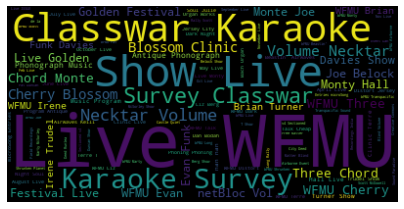

In [ ]:
from io import StringIO
si=StringIO()
tracks_albums['title'].apply(lambda x: si.write(str(x)+" "))
s=si.getvalue()
si.close()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = s
wordcloud = WordCloud(background_color="black",max_words=len(s),random_state=0,max_font_size=75).generate(text)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tracks_albums.drop_duplicates(subset='id',keep='first',inplace=True)

In [ ]:
tracks_albums.head()

,date_released,id,listens,title,type
track_id,,,,,
2,2009-01-05 00:00:00,1,6073,AWOL - A Way Of Life,Album
10,2008-02-06 00:00:00,6,47632,Constant Hitmaker,Album
20,2009-01-06 00:00:00,4,2710,Niris,Album
135,2009-01-07 00:00:00,58,3331,mp3,Single Tracks
137,2006-12-01 00:00:00,59,1681,Live at LACE,Live Performance


In [ ]:
tracks_albums.shape

(14854, 5)

In [ ]:
data=tracks_albums['date_released'].astype(str)
tracks_albums['date_released']=data.apply(lambda x: x.split()[0])

In [ ]:
tracks_albums.head(2)

,date_released,id,listens,title,type
track_id,,,,,
2,2009-01-05,1,6073,AWOL - A Way Of Life,Album
10,2008-02-06,6,47632,Constant Hitmaker,Album


In [ ]:
tracks_albums['year']=pd.DatetimeIndex(tracks_albums['date_released']).year.fillna(0.0).astype(int)

In [ ]:
tracks_albums.head(2)

,date_released,id,listens,title,type,year
track_id,,,,,,
2,2009-01-05,1,6073,AWOL - A Way Of Life,Album,2009
10,2008-02-06,6,47632,Constant Hitmaker,Album,2008


In [ ]:
tracks_albums['month_year'] = pd.to_datetime(tracks_albums['date_released']).dt.to_period('M')
tracks_albums.head(2)

,date_released,id,listens,title,type,year,month_year
track_id,,,,,,,
2,2009-01-05,1,6073,AWOL - A Way Of Life,Album,2009,2009-01
10,2008-02-06,6,47632,Constant Hitmaker,Album,2008,2008-02


In [ ]:
albums_years=tracks_albums[tracks_albums['year']!=0]

In [ ]:
albums_years.shape

(9450, 7)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


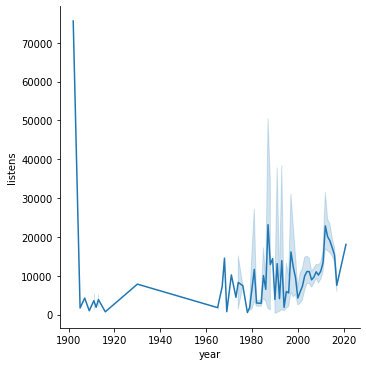

In [ ]:
sns.relplot('year','listens',data=albums_years,kind='line')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


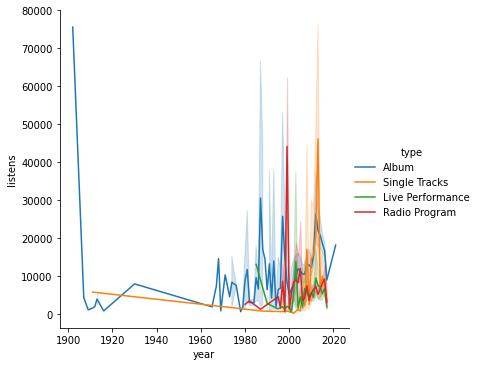

In [ ]:
sns.relplot('year','listens',data=albums_years,kind='line',hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


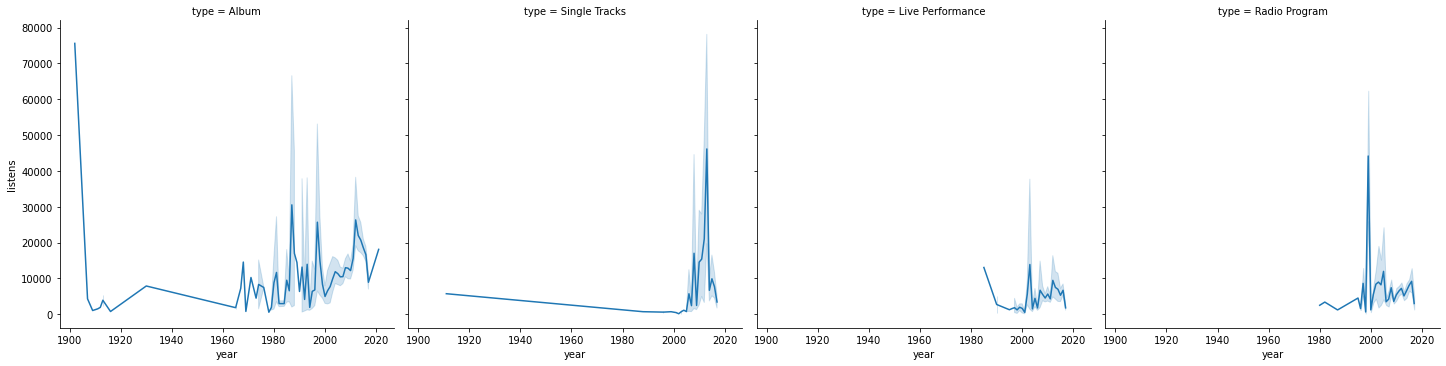

In [ ]:
sns.relplot('year','listens',data=albums_years,kind='line',col='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


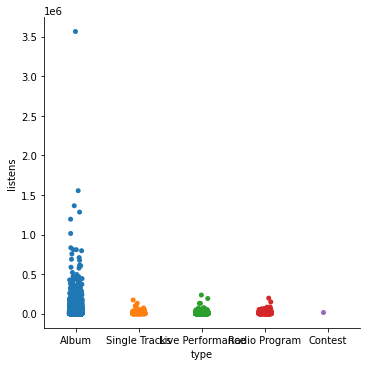

In [ ]:
sns.catplot('type','listens',data=tracks_albums)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


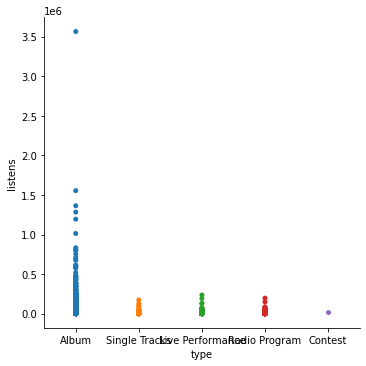

In [ ]:
sns.catplot('type','listens',data=tracks_albums,jitter=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


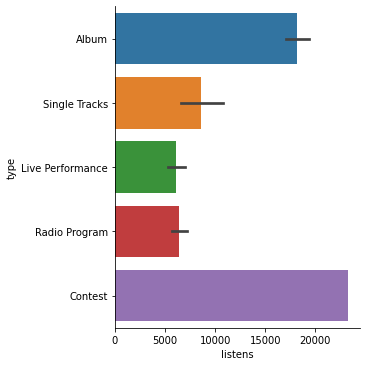

In [ ]:
sns.catplot('listens','type',data=tracks_albums,kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


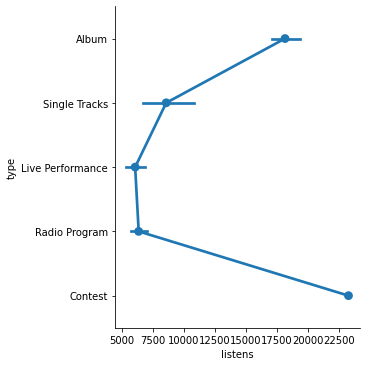

In [ ]:
sns.catplot('listens','type',data=tracks_albums,kind='point')

In [ ]:
tracks['track'].head().T

track_id,2,3,5,10,20
bit_rate,256000,256000,256000,192000,256000
comments,0,0,0,0,0
composer,NaN,NaN,NaN,Kurt Vile,NaN
date_created,2008-11-26 01:48:12,2008-11-26 01:48:14,2008-11-26 01:48:20,2008-11-25 17:49:06,2008-11-26 01:48:56
date_recorded,2008-11-26 00:00:00,2008-11-26 00:00:00,2008-11-26 00:00:00,2008-11-26 00:00:00,2008-01-01 00:00:00
duration,168,237,206,161,311
favorites,2,1,6,178,0
genre_top,Hip-Hop,Hip-Hop,Hip-Hop,Pop,NaN
genres,[21],[21],[21],[10],"[76, 103]"
genres_all,[21],[21],[21],[10],"[17, 10, 76, 103]"


In [ ]:
tracks['track'].isnull().sum()

bit_rate              0
comments              0
composer         102904
date_created          0
date_recorded    100415
duration              0
favorites             0
genre_top         56976
genres                0
genres_all            0
information      104225
interest              0
language_code     91550
license              87
listens               0
lyricist         106263
number                0
publisher        105311
tags                  0
title                 1
dtype: int64

Genres data:

In [ ]:
genres = pd.read_csv("drive/My Drive/DataSets/fma/genres.csv")

In [ ]:
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [ ]:
genresDict={}
for ind in genres.index:
  key = genres['genre_id'][ind]
  value = genres['title'][ind]
  genresDict[key]=value

In [ ]:
print(genresDict)

{1: 'Avant-Garde', 2: 'International', 3: 'Blues', 4: 'Jazz', 5: 'Classical', 6: 'Novelty', 7: 'Comedy', 8: 'Old-Time / Historic', 9: 'Country', 10: 'Pop', 11: 'Disco', 12: 'Rock', 13: 'Easy Listening', 14: 'Soul-RnB', 15: 'Electronic', 16: 'Sound Effects', 17: 'Folk', 18: 'Soundtrack', 19: 'Funk', 20: 'Spoken', 21: 'Hip-Hop', 22: 'Audio Collage', 25: 'Punk', 26: 'Post-Rock', 27: 'Lo-Fi', 30: 'Field Recordings', 31: 'Metal', 32: 'Noise', 33: 'Psych-Folk', 36: 'Krautrock', 37: 'Jazz: Vocal', 38: 'Experimental', 41: 'Electroacoustic', 42: 'Ambient Electronic', 43: 'Radio Art', 45: 'Loud-Rock', 46: 'Latin America', 47: 'Drone', 49: 'Free-Folk', 53: 'Noise-Rock', 58: 'Psych-Rock', 63: 'Bluegrass', 64: 'Electro-Punk', 65: 'Radio', 66: 'Indie-Rock', 70: 'Industrial', 71: 'No Wave', 74: 'Free-Jazz', 76: 'Experimental Pop', 77: 'French', 79: 'Reggae - Dub', 81: 'Afrobeat', 83: 'Nerdcore', 85: 'Garage', 86: 'Indian', 88: 'New Wave', 89: 'Post-Punk', 90: 'Sludge', 92: 'African', 94: 'Freak-Folk'

In [ ]:
genre_id=pd.Series(tracks['track']['genres'].apply(lambda row : str(row[1:][:-1].split(',')[0])))

Combining tracks and genres data:

In [ ]:
tracks = pd.concat([tracks['track']['title'],tracks['track']['duration'],tracks['track']['favorites'],tracks['track']['genres'],tracks['track']['genres_all'],tracks['track']['interest'],tracks['track']['listens']],axis=1)

In [ ]:
tracks.head()

,title,duration,favorites,genres,genres_all,interest,listens
track_id,,,,,,,
2,Food,168,2,[21],[21],4656,1293
3,Electric Ave,237,1,[21],[21],1470,514
5,This World,206,6,[21],[21],1933,1151
10,Freeway,161,178,[10],[10],54881,50135
20,Spiritual Level,311,0,"[76, 103]","[17, 10, 76, 103]",978,361


In [ ]:
tracks['genre_id']=genre_id
tracks.head()

,title,duration,favorites,genres,genres_all,interest,listens,genre_id
track_id,,,,,,,,
2,Food,168,2,[21],[21],4656,1293,21
3,Electric Ave,237,1,[21],[21],1470,514,21
5,This World,206,6,[21],[21],1933,1151,21
10,Freeway,161,178,[10],[10],54881,50135,10
20,Spiritual Level,311,0,"[76, 103]","[17, 10, 76, 103]",978,361,76


In [ ]:
tracks=tracks[tracks.genre_id != '']

In [ ]:
tracks['genre_id'] = tracks['genre_id'].apply(lambda id : int(id))

In [ ]:
tracks['genre_title']=tracks['genre_id'].apply(lambda id : genresDict[id])
tracks.head()

,title,duration,favorites,genres,genres_all,interest,listens,genre_id,genre_title
track_id,,,,,,,,,
2,Food,168,2,[21],[21],4656,1293,21,Hip-Hop
3,Electric Ave,237,1,[21],[21],1470,514,21,Hip-Hop
5,This World,206,6,[21],[21],1933,1151,21,Hip-Hop
10,Freeway,161,178,[10],[10],54881,50135,10,Pop
20,Spiritual Level,311,0,"[76, 103]","[17, 10, 76, 103]",978,361,76,Experimental Pop


In [ ]:
from io import StringIO
si=StringIO()
tracks['genre_title'].apply(lambda x: si.write(str(x)+" "))
s=si.getvalue()
si.close()

In [ ]:
s[0:500]

'Hip-Hop Hip-Hop Hip-Hop Pop Experimental Pop Experimental Pop Experimental Pop Experimental Pop Experimental Pop Hip-Hop Loud-Rock Loud-Rock Avant-Garde Avant-Garde Folk Folk Folk Folk Jazz Jazz Jazz Jazz Avant-Garde Avant-Garde Avant-Garde Punk Punk Post-Rock Post-Rock Post-Rock Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recordings Field Recording'

 Word Cloud of genres column:

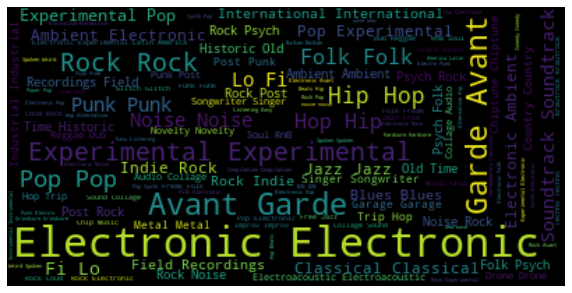

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = s
wordcloud = WordCloud(background_color="black",max_words=len(s),random_state=0,max_font_size=256).generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud with mask:

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

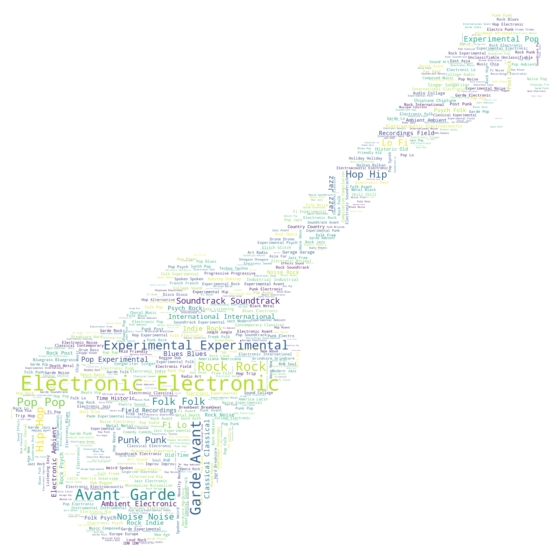

In [ ]:
mask = np.array(Image.open('drive/My Drive/DataVisProject/guitar.jpg'))
wordcloud = WordCloud(background_color="white",random_state=0, max_words=len(s), max_font_size=250, mask=mask, width=mask.shape[1],
                      height=mask.shape[0]).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

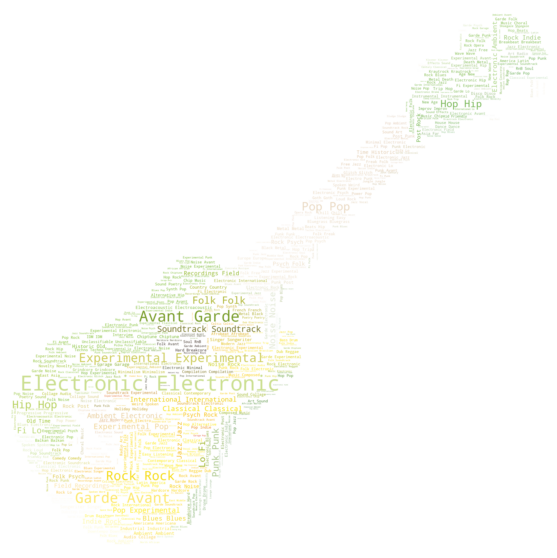

In [ ]:
mask_colors = ImageColorGenerator(mask)
mask = np.array(Image.open('drive/My Drive/DataVisProject/guitar.jpg'))
wordcloud = WordCloud(background_color="white",random_state=0, max_words=len(s), max_font_size=250, mask=mask, width=mask.shape[1],
                      height=mask.shape[0], color_func=mask_colors).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print(tracks.genre_title.value_counts())

Electronic               20325
Avant-Garde               8693
Experimental              6697
Rock                      6639
Pop                       5910
                         ...  
Symphony                     2
Nu-Jazz                      2
Cumbia                       2
Easy Listening: Vocal        1
N. Indian Traditional        1
Name: genre_title, Length: 148, dtype: int64


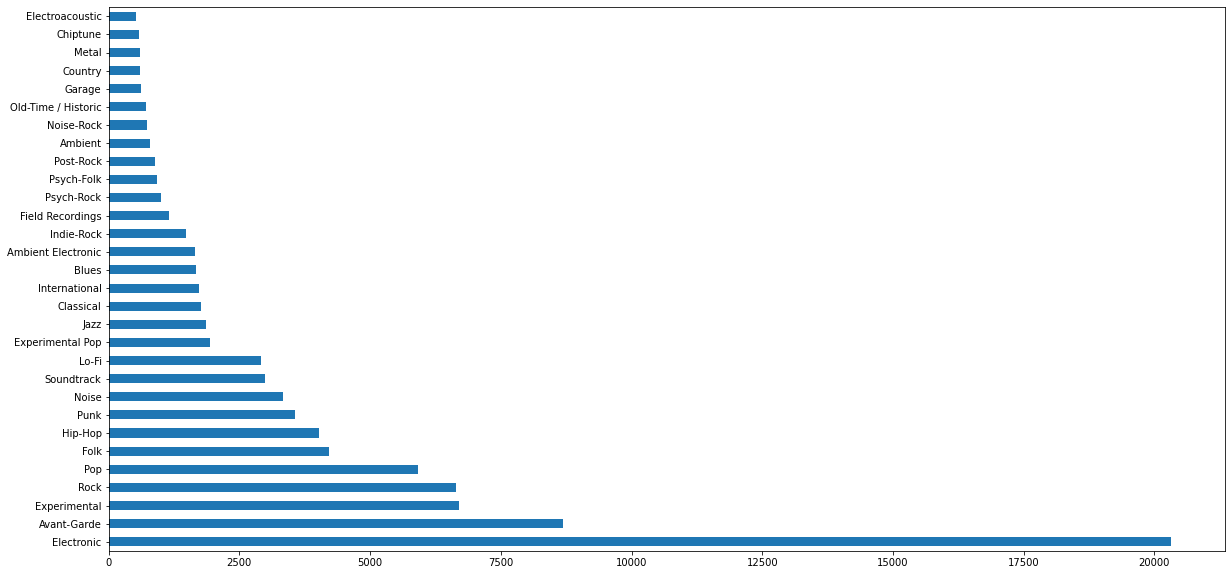

In [ ]:
tracks['genre_title'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [ ]:
tracks_top = tracks[tracks.genre_title.isin(['Electronic', 'Avant-Garde', 'Experimental', 'Rock', 'Pop', 'Folk', 'Hip-Hop', 'Punk', 'Noise', 'Soundtrack'])]

In [ ]:
tracks.shape, tracks_top.shape

((104343, 9), (66383, 9))

In [ ]:
tracks_top.describe()

,duration,favorites,interest,listens,genre_id
count,66383.000000,66383.000000,6.638300e+04,66383.000000,66383.000000
mean,277.116069,2.736499,3.179942e+03,2088.542066,16.757890
std,285.265256,12.947590,2.093406e+04,8030.192985,10.089395
min,0.000000,0.000000,2.000000e+00,1.000000,1.000000
25%,152.000000,0.000000,5.680000e+02,272.000000,12.000000
50%,220.000000,1.000000,1.226000e+03,700.000000,15.000000
75%,309.000000,2.000000,2.762500e+03,1805.000000,21.000000
max,18350.000000,1482.000000,3.293557e+06,543252.000000,38.000000


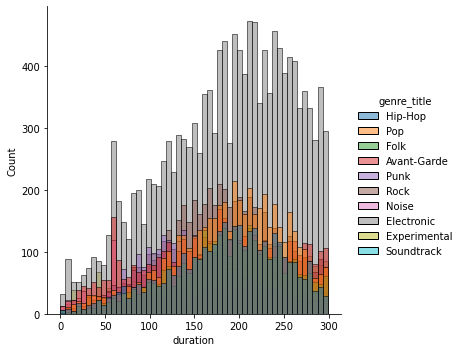

In [ ]:
sns.displot(tracks_top.query("duration < 300"),x='duration',hue="genre_title")

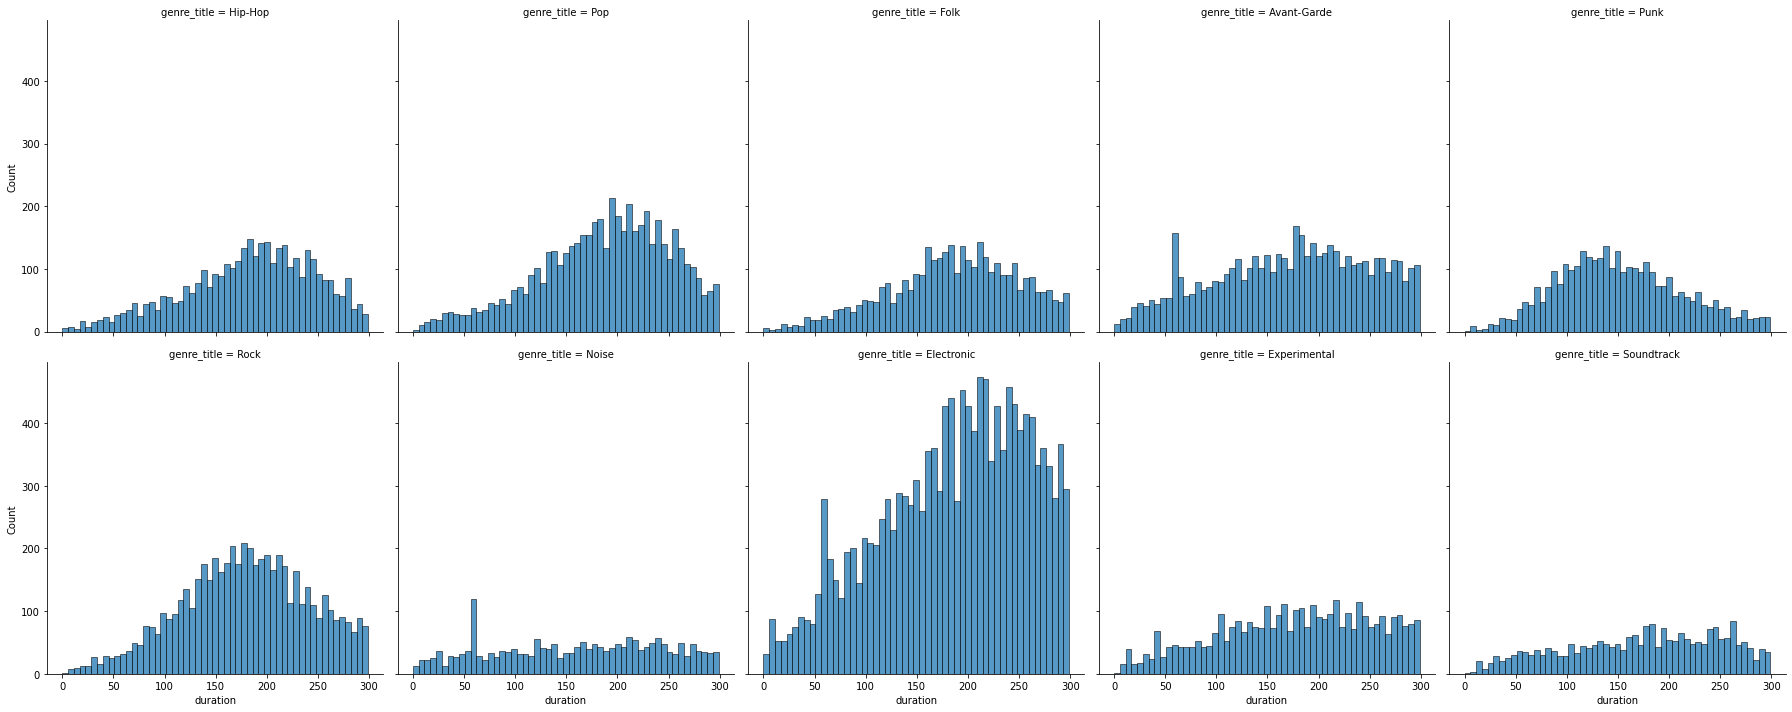

In [ ]:
sns.displot(tracks_top.query("duration < 300"),x='duration',col="genre_title",col_wrap=5)

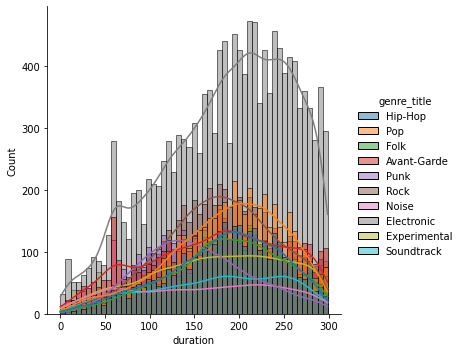

In [ ]:
sns.displot(x="duration",data=tracks_top.query("duration < 300"),kde=True,hue='genre_title')

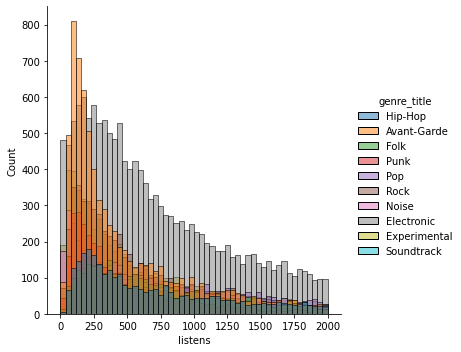

In [ ]:
sns.displot(tracks_top.query("listens<2000"),x='listens',hue="genre_title")

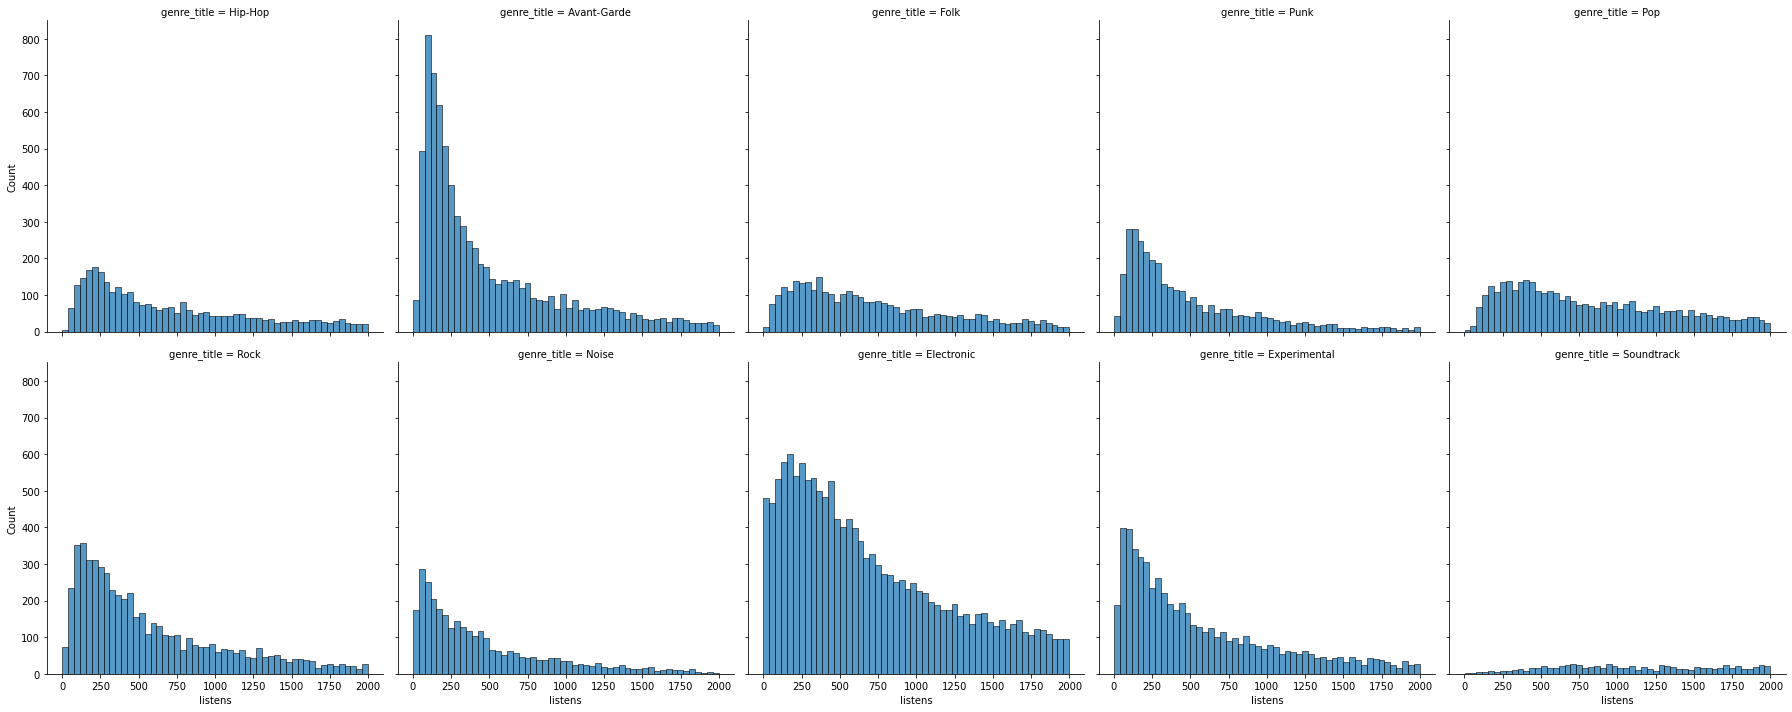

In [ ]:
sns.displot(tracks_top.query("listens<2000"),x='listens',col="genre_title",col_wrap=5)

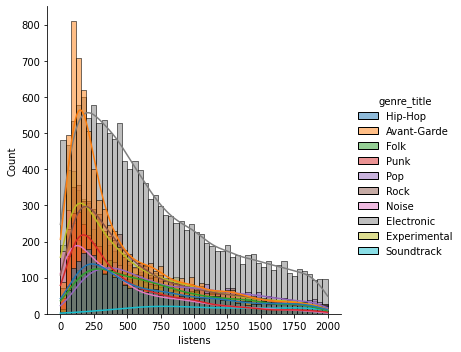

In [ ]:
sns.displot(tracks_top.query("listens<2000"),x='listens',hue="genre_title",kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


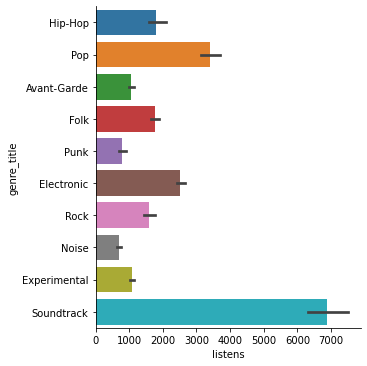

In [ ]:
sns.catplot('listens','genre_title',data=tracks_top,kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


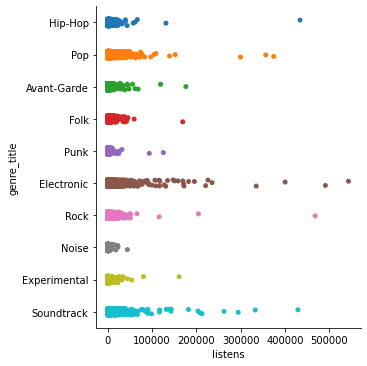

In [ ]:
sns.catplot('listens','genre_title',data=tracks_top)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


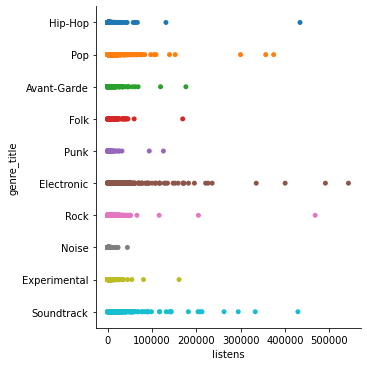

In [ ]:
sns.catplot('listens','genre_title',data=tracks_top,jitter=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


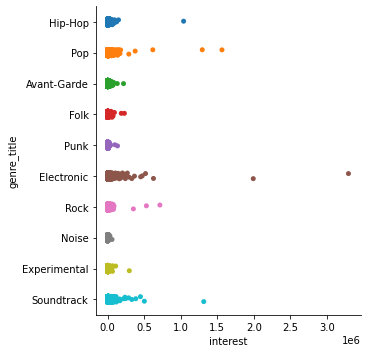

In [ ]:
sns.catplot('interest','genre_title',data=tracks_top)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


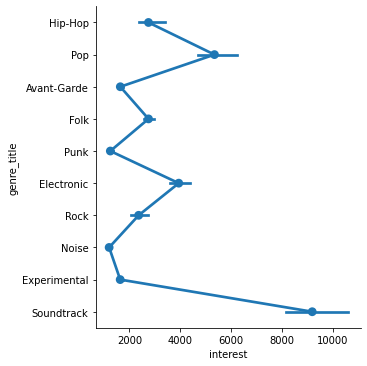

In [ ]:
sns.catplot('interest','genre_title',data=tracks_top,kind='point')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


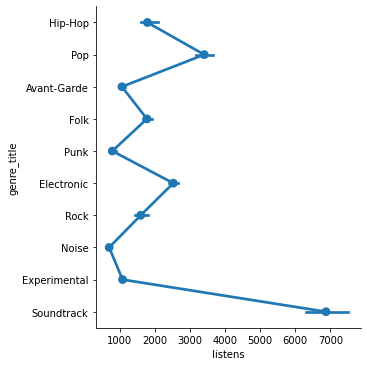

In [ ]:
sns.catplot('listens','genre_title',data=tracks_top,kind='point')

In [ ]:
genres = pd.read_csv("drive/My Drive/DataSets/fma/genres.csv")

In [ ]:
genres.head().T

,0,1,2,3,4
genre_id,1,2,3,4,5
#tracks,8693,5271,1752,4126,4106
parent,38,0,0,0,0
title,Avant-Garde,International,Blues,Jazz,Classical
top_level,38,2,3,4,5


In [ ]:
genres['NumOfTracks']=genres['#tracks']
genres.drop('#tracks',axis=1,inplace=True)
genres.head()

,genre_id,parent,title,top_level,NumOfTracks
0,1,38,Avant-Garde,38,8693
1,2,0,International,2,5271
2,3,0,Blues,3,1752
3,4,0,Jazz,4,4126
4,5,0,Classical,5,4106


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


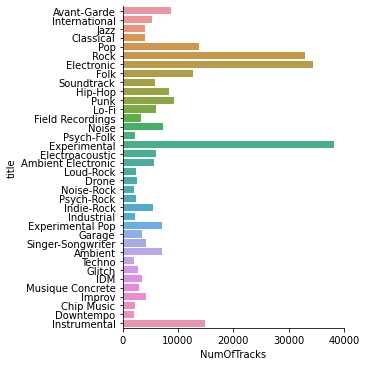

In [ ]:
sns.catplot('NumOfTracks','title',data=genres.query("NumOfTracks > 2000"),kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


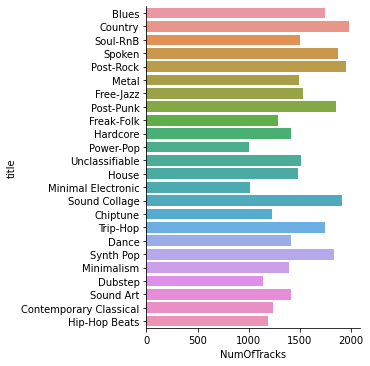

In [ ]:
sns.catplot('NumOfTracks','title',data=genres.query("NumOfTracks > 1000 and NumOfTracks < 2000"),kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


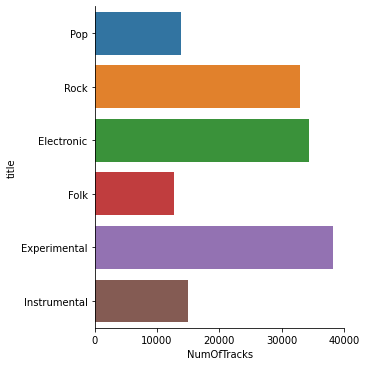

In [ ]:
sns.catplot('NumOfTracks','title',data=genres.query("NumOfTracks > 10000"),kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


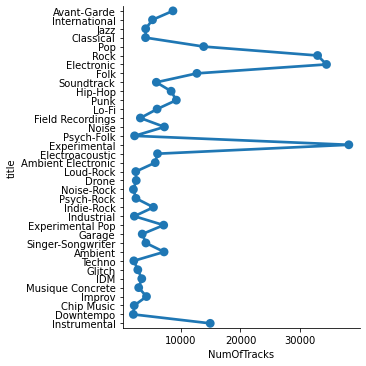

In [ ]:
sns.catplot('NumOfTracks','title',data=genres.query("NumOfTracks > 2000"),kind='point')

Echonest/Spotify data: 8 Audio features

In [ ]:
echonestData = pd.read_csv('drive/My Drive/DataSets/fma/echonest.csv',index_col=0, header=[0, 1,2])

In [ ]:
echonestData.head(2)

echonest                         ...                                         
         audio_features                         ... temporal_features                       
           acousticness danceability    energy  ...               221        222         223
track_id                                        ...                                         
2              0.416675     0.675894  0.634476  ...           3.61288  13.316690  262.929749
3              0.374408     0.528643  0.817461  ...           6.01864  16.673548  325.581085

[2 rows x 249 columns]

In [ ]:
audioFeatures = echonestData['echonest']['audio_features']
audioFeatures.head(2)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240


In [ ]:
tracks_top.head(2)

,title,duration,favorites,genres,genres_all,interest,listens,genre_id,genre_title
track_id,,,,,,,,,
2,Food,168,2,[21],[21],4656,1293,21,Hip-Hop
3,Electric Ave,237,1,[21],[21],1470,514,21,Hip-Hop


In [ ]:
audioFeaturesSetA=audioFeatures.merge(tracks_top,left_index=True,right_index=True,how='inner')
print(audioFeaturesSetA.shape)

(9175, 17)


In [ ]:
audioFeaturesSetA.head(5)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,title,duration,favorites,genres,genres_all,interest,listens,genre_id,genre_title
track_id,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Food,168,2,[21],[21],4656,1293,21,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Electric Ave,237,1,[21],[21],1470,514,21,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,This World,206,6,[21],[21],1933,1151,21,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Freeway,161,178,[10],[10],54881,50135,10,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Street Music,207,3,[21],[21],1126,943,21,Hip-Hop


In [ ]:
audioFeaturesSetA.genre_title.unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Punk', 'Electronic', 'Rock',
       'Soundtrack'], dtype=object)

In [ ]:
audioFeaturesSetA.genre_title.nunique()

7

In [ ]:
labels=list(audioFeatures.columns)
labels

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence']

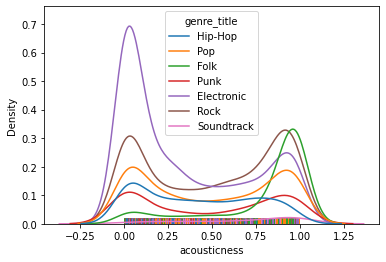

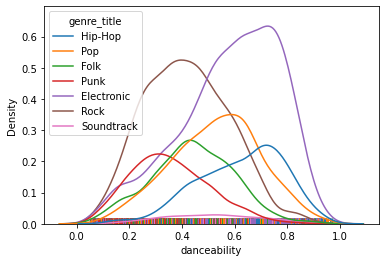

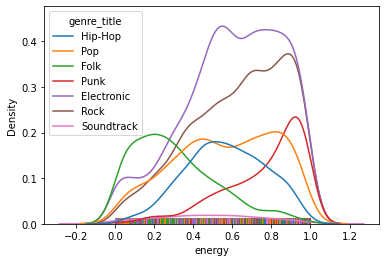

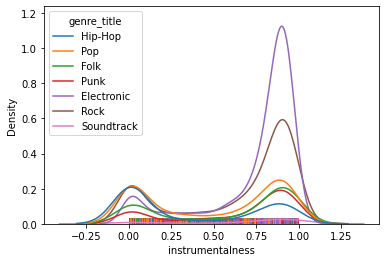

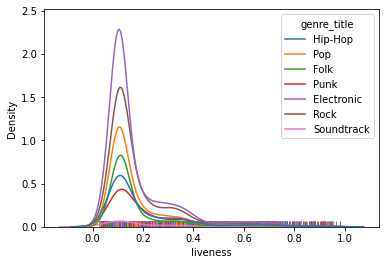

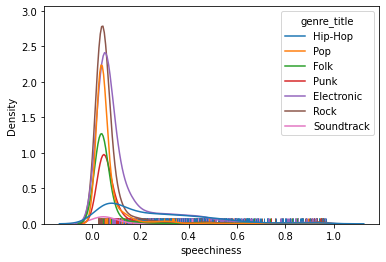

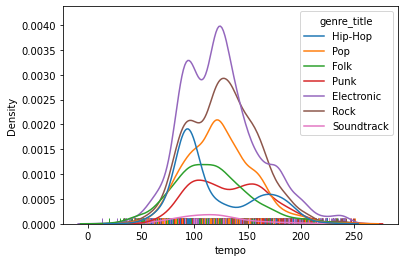

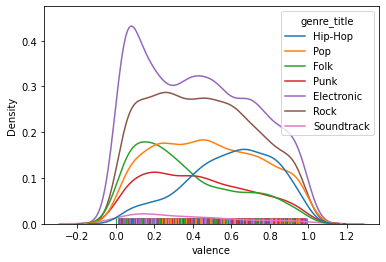

In [ ]:
for label in labels:
  plt.figure()
  ax=sns.kdeplot(x=label,data=audioFeaturesSetA,hue="genre_title")
  ax=sns.rugplot(x=label,data=audioFeaturesSetA,hue="genre_title")

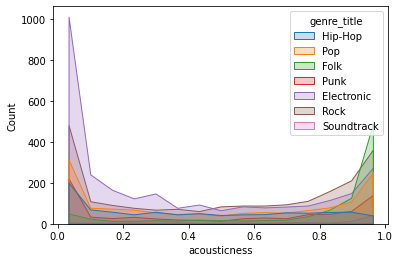

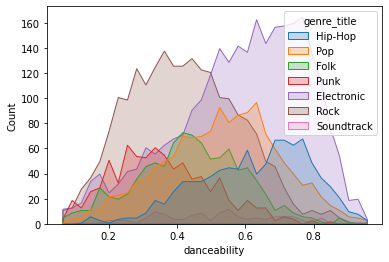

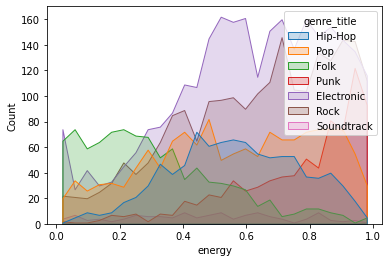

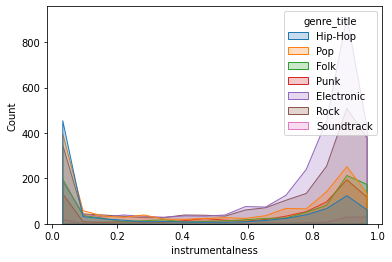

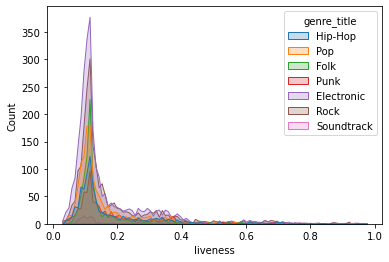

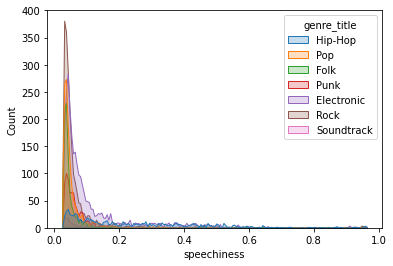

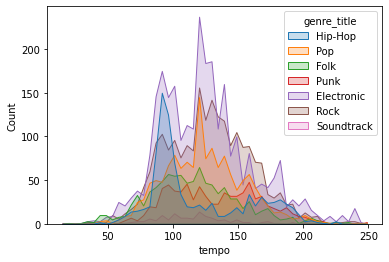

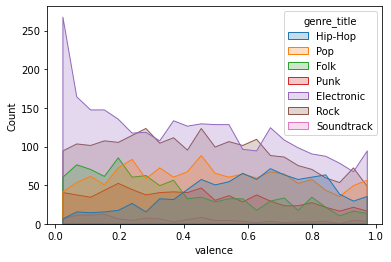

In [ ]:
for label in labels:
  plt.figure()
  ax=sns.histplot(x=label,data=audioFeaturesSetA,hue="genre_title", element="poly")

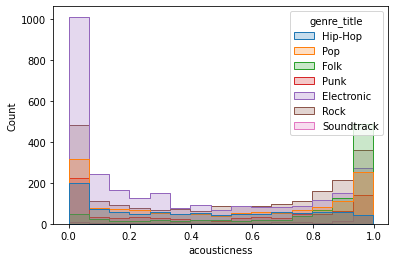

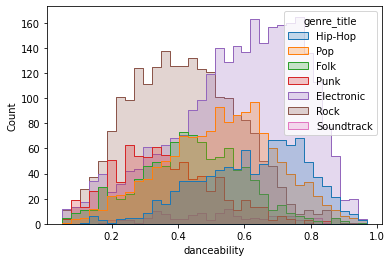

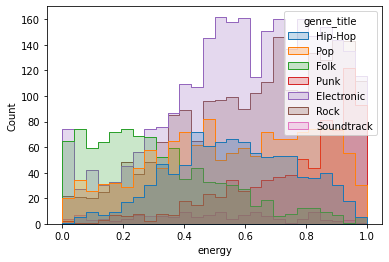

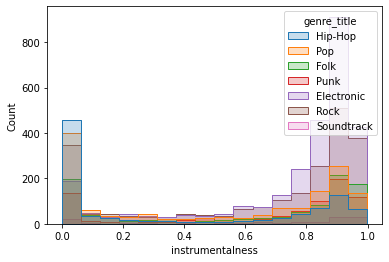

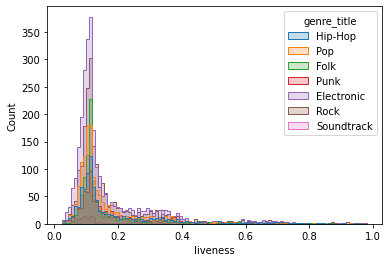

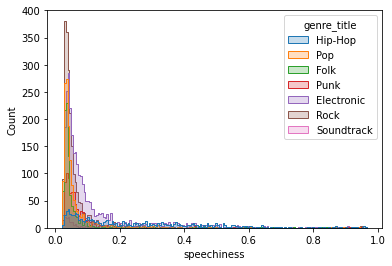

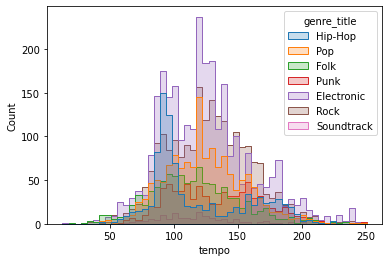

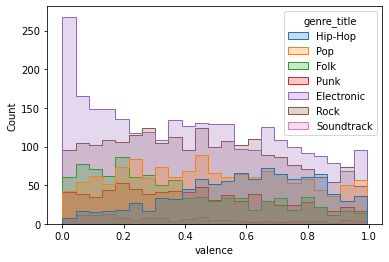

In [ ]:
for label in labels:
  plt.figure()
  ax=sns.histplot(x=label,data=audioFeaturesSetA,hue="genre_title", element="step")

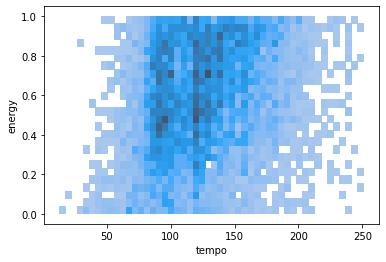

In [ ]:
sns.histplot(audioFeaturesSetA,x='tempo',y='energy')

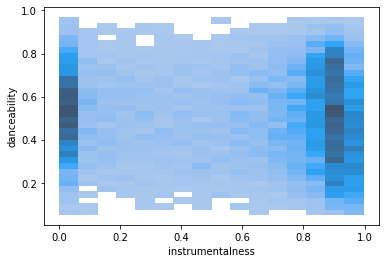

In [ ]:
sns.histplot(audioFeaturesSetA,x='instrumentalness',y='danceability')

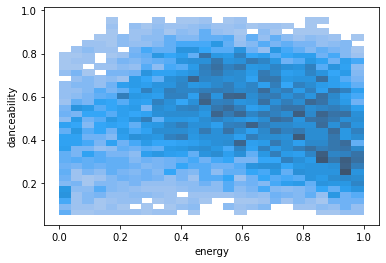

In [ ]:
sns.histplot(audioFeaturesSetA,x='energy',y='danceability')

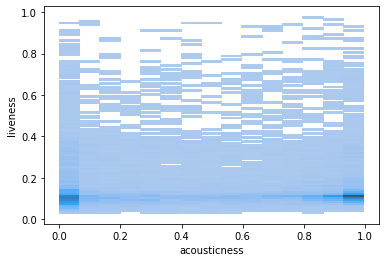

In [ ]:
sns.histplot(audioFeaturesSetA,x='acousticness',y='liveness')

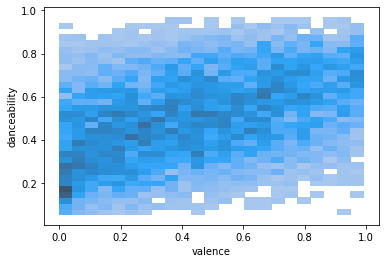

In [ ]:
sns.histplot(audioFeaturesSetA,x='valence',y='danceability')

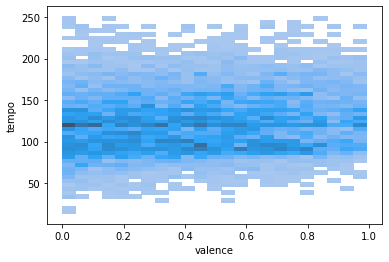

In [ ]:
sns.histplot(audioFeaturesSetA,x='valence',y='tempo')

In [ ]:
audioFeatures.mean(), audioFeatures.median()

(acousticness          0.524688
 danceability          0.487290
 energy                0.537516
 instrumentalness      0.640536
 liveness              0.187804
 speechiness           0.099174
 tempo               123.080061
 valence               0.439761
 dtype: float64, acousticness          0.573985
 danceability          0.485635
 energy                0.549113
 instrumentalness      0.838134
 liveness              0.119002
 speechiness           0.049019
 tempo               120.057000
 valence               0.417743
 dtype: float64)

In [ ]:
audioFeatures.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [ ]:
num_vars=len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

Radial Charts comparing different genres and corresponding 8 audio features:

In [ ]:
def plotTopGenreFeatures(genreTitle,colour):
  features = [np.median(audioFeaturesSetA['acousticness'][audioFeaturesSetA.genre_title == genreTitle]), 
              np.median(audioFeaturesSetA['danceability'][audioFeaturesSetA.genre_title == genreTitle]),
              np.median(audioFeaturesSetA['energy'][audioFeaturesSetA.genre_title == genreTitle]),
              np.mean(audioFeaturesSetA['instrumentalness'][audioFeaturesSetA.genre_title == genreTitle]),
              np.median(audioFeaturesSetA['liveness'][audioFeaturesSetA.genre_title == genreTitle]),
              np.median(audioFeaturesSetA['speechiness'][audioFeaturesSetA.genre_title == genreTitle]),
              np.median(audioFeaturesSetA['tempo'][audioFeaturesSetA.genre_title == genreTitle]),
              np.median(audioFeaturesSetA['valence'][audioFeaturesSetA.genre_title == genreTitle])]
  features[-2] = features[-2]/251
  features[-3] = features[-3] * 4
  features += features[:1]
  ax.plot(angles, features, color=colour, linewidth = 1, label = genreTitle)
  ax.fill(angles, features, color=colour, alpha = 0.25)

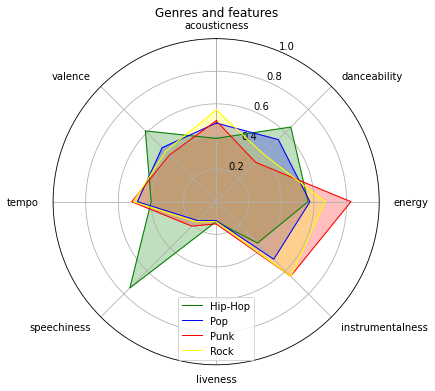

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures('Hip-Hop','green')
plotTopGenreFeatures('Pop','blue')
plotTopGenreFeatures('Punk','red')
plotTopGenreFeatures('Rock','yellow')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')

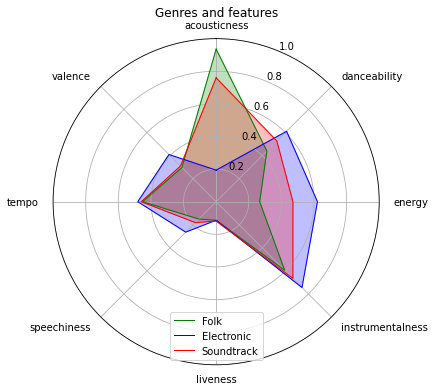

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures('Folk','green')
plotTopGenreFeatures('Electronic','blue')
plotTopGenreFeatures('Soundtrack','red')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')

In [ ]:
audioFeatures = audioFeatures.merge(tracks, left_index=True, right_index=True, how='inner')
audioFeatures.shape

(13129, 17)

In [ ]:
audioFeatures.head(2)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,title,duration,favorites,genres,genres_all,interest,listens,genre_id,genre_title
track_id,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Food,168,2,[21],[21],4656,1293,21,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Electric Ave,237,1,[21],[21],1470,514,21,Hip-Hop


In [ ]:
audioFeatures.drop(['genres','genres_all','favorites','duration','interest','listens'],axis=1,inplace=True)

In [ ]:
audioFeatures.genre_title.unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Jazz', 'Post-Rock', 'Punk',
       'Electronic', 'Rock', 'Metal', 'Post-Punk', 'Blues',
       'International', 'Psych-Rock', 'Indie-Rock', 'Psych-Folk',
       'Classical', 'Old-Time / Historic', 'Trip-Hop', 'Compilation',
       'Soundtrack', 'Chiptune', 'Sound Art', 'Kid-Friendly'],
      dtype=object)

In [ ]:
genres[genres.genre_id==12]

,genre_id,parent,title,top_level,NumOfTracks
11,12,0,Rock,12,32923


In [ ]:
genres[genres.parent==12][genres.title.isin(['Hip-Hop', 'Pop', 'Folk', 'Jazz', 'Post-Rock', 'Punk',
       'Electronic', 'Rock', 'Metal', 'Post-Punk', 'Blues',
       'International', 'Psych-Rock', 'Indie-Rock', 'Psych-Folk',
       'Classical', 'Old-Time / Historic', 'Trip-Hop', 'Compilation',
       'Soundtrack', 'Chiptune', 'Sound Art', 'Kid-Friendly'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,genre_id,parent,title,top_level,NumOfTracks
22,25,12,Punk,12,9261
23,26,12,Post-Rock,12,1952
26,31,12,Metal,12,1498
40,58,12,Psych-Rock,12,2502
44,66,12,Indie-Rock,12,5432


In [ ]:
def plotGenreFeatures(genreTitle,colour):
  features = [np.median(audioFeatures['acousticness'][audioFeatures.genre_title == genreTitle]), 
              np.median(audioFeatures['danceability'][audioFeatures.genre_title == genreTitle]),
              np.median(audioFeatures['energy'][audioFeatures.genre_title == genreTitle]),
              np.mean(audioFeatures['instrumentalness'][audioFeatures.genre_title == genreTitle]),
              np.median(audioFeatures['liveness'][audioFeatures.genre_title == genreTitle]),
              np.median(audioFeatures['speechiness'][audioFeatures.genre_title == genreTitle]),
              np.median(audioFeatures['tempo'][audioFeatures.genre_title == genreTitle]),
              np.median(audioFeatures['valence'][audioFeatures.genre_title == genreTitle])]
  features[-2] = features[-2]/251
  features[-3] = features[-3] * 4
  features += features[:1]
  ax.plot(angles, features, color=colour, linewidth = 1, label = genreTitle)
  ax.fill(angles, features, color=colour, alpha = 0.1)

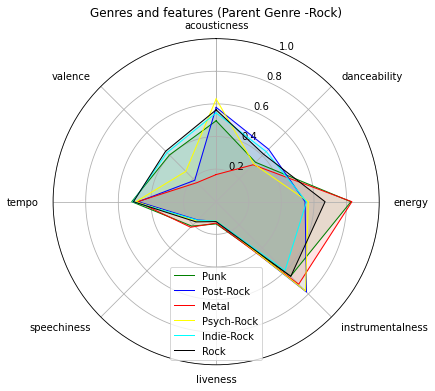

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotGenreFeatures('Punk','green')
plotGenreFeatures('Post-Rock','blue')
plotGenreFeatures('Metal','red')
plotGenreFeatures('Psych-Rock','yellow')
plotGenreFeatures('Indie-Rock','cyan')
plotGenreFeatures('Rock','black')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features (Parent Genre -Rock)')
ax.legend(loc='lower center')

In [ ]:
genres[genres.parent==25][genres.title.isin(['Hip-Hop', 'Pop', 'Folk', 'Jazz', 'Post-Rock', 'Punk',
       'Electronic', 'Rock', 'Metal', 'Post-Punk', 'Blues',
       'International', 'Psych-Rock', 'Indie-Rock', 'Psych-Folk',
       'Classical', 'Old-Time / Historic', 'Trip-Hop', 'Compilation',
       'Soundtrack', 'Chiptune', 'Sound Art', 'Kid-Friendly'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,genre_id,parent,title,top_level,NumOfTracks
56,89,25,Post-Punk,12,1858


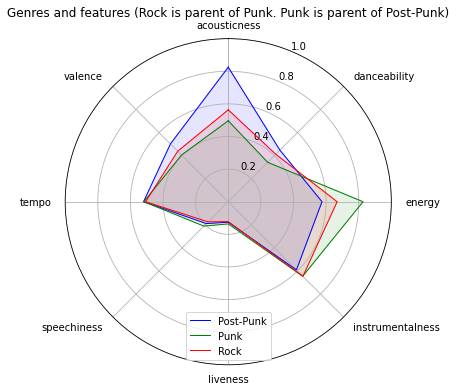

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotGenreFeatures('Post-Punk','blue')
plotGenreFeatures('Punk','green')
plotGenreFeatures('Rock','red')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features (Rock is parent of Punk. Punk is parent of Post-Punk)')
ax.legend(loc='lower center')

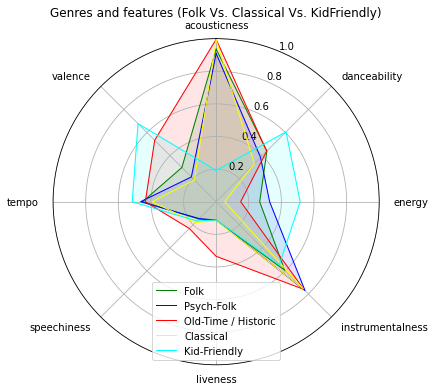

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotGenreFeatures('Folk','green')
plotGenreFeatures('Psych-Folk','blue')
plotGenreFeatures('Old-Time / Historic','red')
plotGenreFeatures('Classical','yellow')
plotGenreFeatures('Kid-Friendly','cyan')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features (Folk Vs. Classical Vs. KidFriendly)')
ax.legend(loc='lower center')

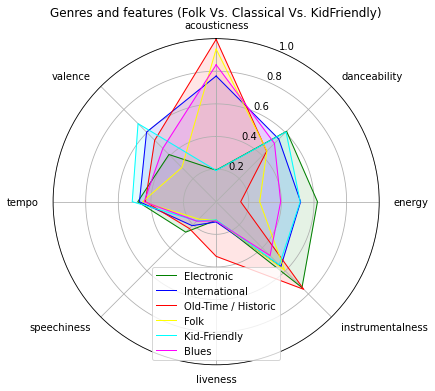

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotGenreFeatures('Electronic','green')
plotGenreFeatures('International','blue')
plotGenreFeatures('Old-Time / Historic','red')
plotGenreFeatures('Folk','yellow')
plotGenreFeatures('Kid-Friendly','cyan')
plotGenreFeatures('Blues','magenta')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features (Folk Vs. Classical Vs. KidFriendly)')
ax.legend(loc='lower center')

Audio features extracted using librosa library:

In [ ]:
librosaFeatures = pd.read_csv('drive/My Drive/DataSets/fma/features.csv',index_col=0, header=[0, 1,2])

In [ ]:
librosaFeatures.head(2).T

track_id                              2         3
feature     statistics number                    
chroma_cens kurtosis   01      7.180653  1.888963
                       02      5.230309  0.760539
                       03      0.249321  0.345297
                       04      1.347620  2.295201
                       05      1.482478  1.654031
...                                 ...       ...
zcr         mean       01      0.085629  0.084578
            median     01      0.071289  0.063965
            min        01      0.000000  0.000000
            skew       01      2.089872  1.716724
            std        01      0.061448  0.069330

[518 rows x 2 columns]

In [ ]:
print(list(librosaFeatures.columns))

[('chroma_cens', 'kurtosis', '01'), ('chroma_cens', 'kurtosis', '02'), ('chroma_cens', 'kurtosis', '03'), ('chroma_cens', 'kurtosis', '04'), ('chroma_cens', 'kurtosis', '05'), ('chroma_cens', 'kurtosis', '06'), ('chroma_cens', 'kurtosis', '07'), ('chroma_cens', 'kurtosis', '08'), ('chroma_cens', 'kurtosis', '09'), ('chroma_cens', 'kurtosis', '10'), ('chroma_cens', 'kurtosis', '11'), ('chroma_cens', 'kurtosis', '12'), ('chroma_cens', 'max', '01'), ('chroma_cens', 'max', '02'), ('chroma_cens', 'max', '03'), ('chroma_cens', 'max', '04'), ('chroma_cens', 'max', '05'), ('chroma_cens', 'max', '06'), ('chroma_cens', 'max', '07'), ('chroma_cens', 'max', '08'), ('chroma_cens', 'max', '09'), ('chroma_cens', 'max', '10'), ('chroma_cens', 'max', '11'), ('chroma_cens', 'max', '12'), ('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean', '02'), ('chroma_cens', 'mean', '03'), ('chroma_cens', 'mean', '04'), ('chroma_cens', 'mean', '05'), ('chroma_cens', 'mean', '06'), ('chroma_cens', 'mean', '07'), ('

In [ ]:
librosaMainFeatures=pd.concat([librosaFeatures['chroma_cens']['mean']['01'],librosaFeatures['chroma_stft']['mean']['01'],librosaFeatures['spectral_contrast']['mean']['01'],librosaFeatures['spectral_centroid']['mean']['01'], librosaFeatures['mfcc']['mean']['01'], librosaFeatures['mfcc']['mean']['02'], librosaFeatures['mfcc']['mean']['03'], librosaFeatures['mfcc']['mean']['04'], librosaFeatures['mfcc']['mean']['05'], librosaFeatures['mfcc']['mean']['06'], librosaFeatures['mfcc']['mean']['07'], librosaFeatures['mfcc']['mean']['08'], librosaFeatures['mfcc']['mean']['09'], librosaFeatures['mfcc']['mean']['10'], librosaFeatures['mfcc']['mean']['11'], librosaFeatures['mfcc']['mean']['12']],axis=1, )

In [ ]:
librosaMainFeatures.head()

,01,01,01,01,01,02,03,04,05,06,07,08,09,10,11,12
track_id,,,,,,,,,,,,,,,,
2,0.474300,0.696063,18.005175,1639.583252,-163.772964,116.696678,-41.753826,29.144329,-15.050158,18.879372,-8.918165,12.002118,-4.253151,1.359791,-2.683000,-0.794632
3,0.232784,0.449602,15.732023,1763.012451,-159.004166,120.158501,-33.233562,47.342003,-6.247318,31.405355,-5.261811,11.618972,-1.595837,5.132730,-3.422679,6.949284
5,0.258420,0.481160,17.097452,1292.958130,-205.440491,132.215073,-16.085823,41.514759,-7.642954,16.942802,-5.651261,9.569445,0.503157,8.673513,-8.271377,0.594473
10,0.229882,0.388109,19.177481,1360.028687,-135.864822,157.040085,-53.453247,17.198896,6.868035,13.934344,-11.749298,8.360711,-5.130381,0.233845,-5.421206,1.679479
20,0.202806,0.346976,16.042891,1732.971802,-135.135895,114.814178,12.354540,19.764219,18.670799,19.643862,3.572509,12.124897,-2.285183,8.835210,-0.805463,4.082942


In [ ]:
librosaMainFeatures.columns = ['chroma_cens','chroma_stft','spectral_contrast','spectral_centroid','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12']

In [ ]:
librosaMainFeatures.head().T

track_id,2,3,5,10,20
chroma_cens,0.474300,0.232784,0.258420,0.229882,0.202806
chroma_stft,0.696063,0.449602,0.481160,0.388109,0.346976
spectral_contrast,18.005175,15.732023,17.097452,19.177481,16.042891
spectral_centroid,1639.583252,1763.012451,1292.958130,1360.028687,1732.971802
mfcc1,-163.772964,-159.004166,-205.440491,-135.864822,-135.135895
mfcc2,116.696678,120.158501,132.215073,157.040085,114.814178
mfcc3,-41.753826,-33.233562,-16.085823,-53.453247,12.354540
mfcc4,29.144329,47.342003,41.514759,17.198896,19.764219
mfcc5,-15.050158,-6.247318,-7.642954,6.868035,18.670799
mfcc6,18.879372,31.405355,16.942802,13.934344,19.643862


In [ ]:
tracks.head()

,title,duration,favorites,genres,genres_all,interest,listens,genre_id,genre_title
track_id,,,,,,,,,
2,Food,168,2,[21],[21],4656,1293,21,Hip-Hop
3,Electric Ave,237,1,[21],[21],1470,514,21,Hip-Hop
5,This World,206,6,[21],[21],1933,1151,21,Hip-Hop
10,Freeway,161,178,[10],[10],54881,50135,10,Pop
20,Spiritual Level,311,0,"[76, 103]","[17, 10, 76, 103]",978,361,76,Experimental Pop


In [ ]:
librosaMainFeatures = librosaMainFeatures.merge(tracks['genre_title'], left_index=True, right_index=True, how='inner')
librosaMainFeatures.shape

(104343, 17)

In [ ]:
librosaMainFeatures.head()

,chroma_cens,chroma_stft,spectral_contrast,spectral_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,genre_title
track_id,,,,,,,,,,,,,,,,,
2,0.474300,0.696063,18.005175,1639.583252,-163.772964,116.696678,-41.753826,29.144329,-15.050158,18.879372,-8.918165,12.002118,-4.253151,1.359791,-2.683000,-0.794632,Hip-Hop
3,0.232784,0.449602,15.732023,1763.012451,-159.004166,120.158501,-33.233562,47.342003,-6.247318,31.405355,-5.261811,11.618972,-1.595837,5.132730,-3.422679,6.949284,Hip-Hop
5,0.258420,0.481160,17.097452,1292.958130,-205.440491,132.215073,-16.085823,41.514759,-7.642954,16.942802,-5.651261,9.569445,0.503157,8.673513,-8.271377,0.594473,Hip-Hop
10,0.229882,0.388109,19.177481,1360.028687,-135.864822,157.040085,-53.453247,17.198896,6.868035,13.934344,-11.749298,8.360711,-5.130381,0.233845,-5.421206,1.679479,Pop
20,0.202806,0.346976,16.042891,1732.971802,-135.135895,114.814178,12.354540,19.764219,18.670799,19.643862,3.572509,12.124897,-2.285183,8.835210,-0.805463,4.082942,Experimental Pop


In [ ]:
librosaSetA = librosaMainFeatures[librosaMainFeatures.genre_title.isin(['Hip-Hop', 'Folk'])]

In [ ]:
librosaSetA.shape

(8229, 17)

In [ ]:
librosaSetA.groupby('genre_title').size()

genre_title
Folk       4209
Hip-Hop    4020
dtype: int64

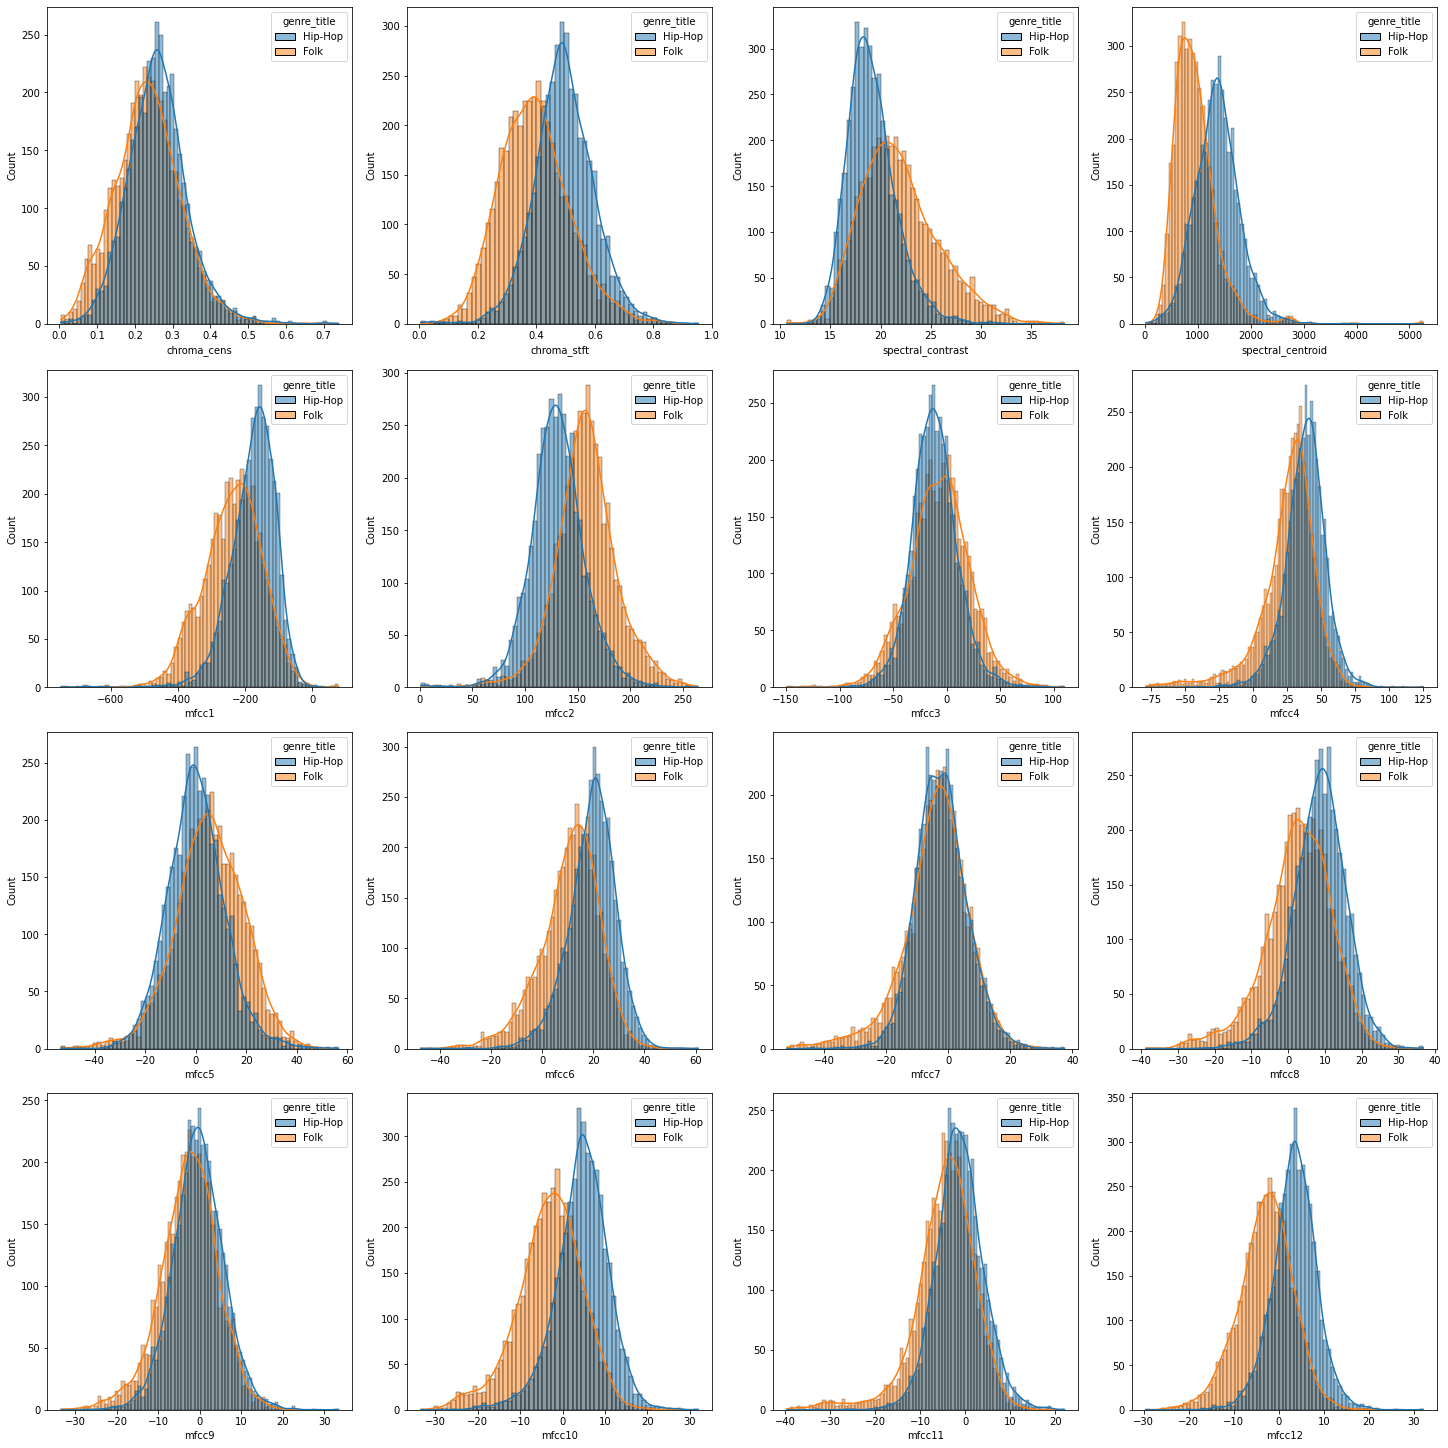

In [ ]:
featuresList = ['chroma_cens','chroma_stft','spectral_contrast','spectral_centroid','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12']
total_cols=4
total_rows=4
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for i,var in enumerate(featuresList):
  row=i // total_cols
  col=i % total_cols
  sns.histplot(x=var,data=librosaSetA,hue="genre_title",kde=True,ax=axes[row][col])   

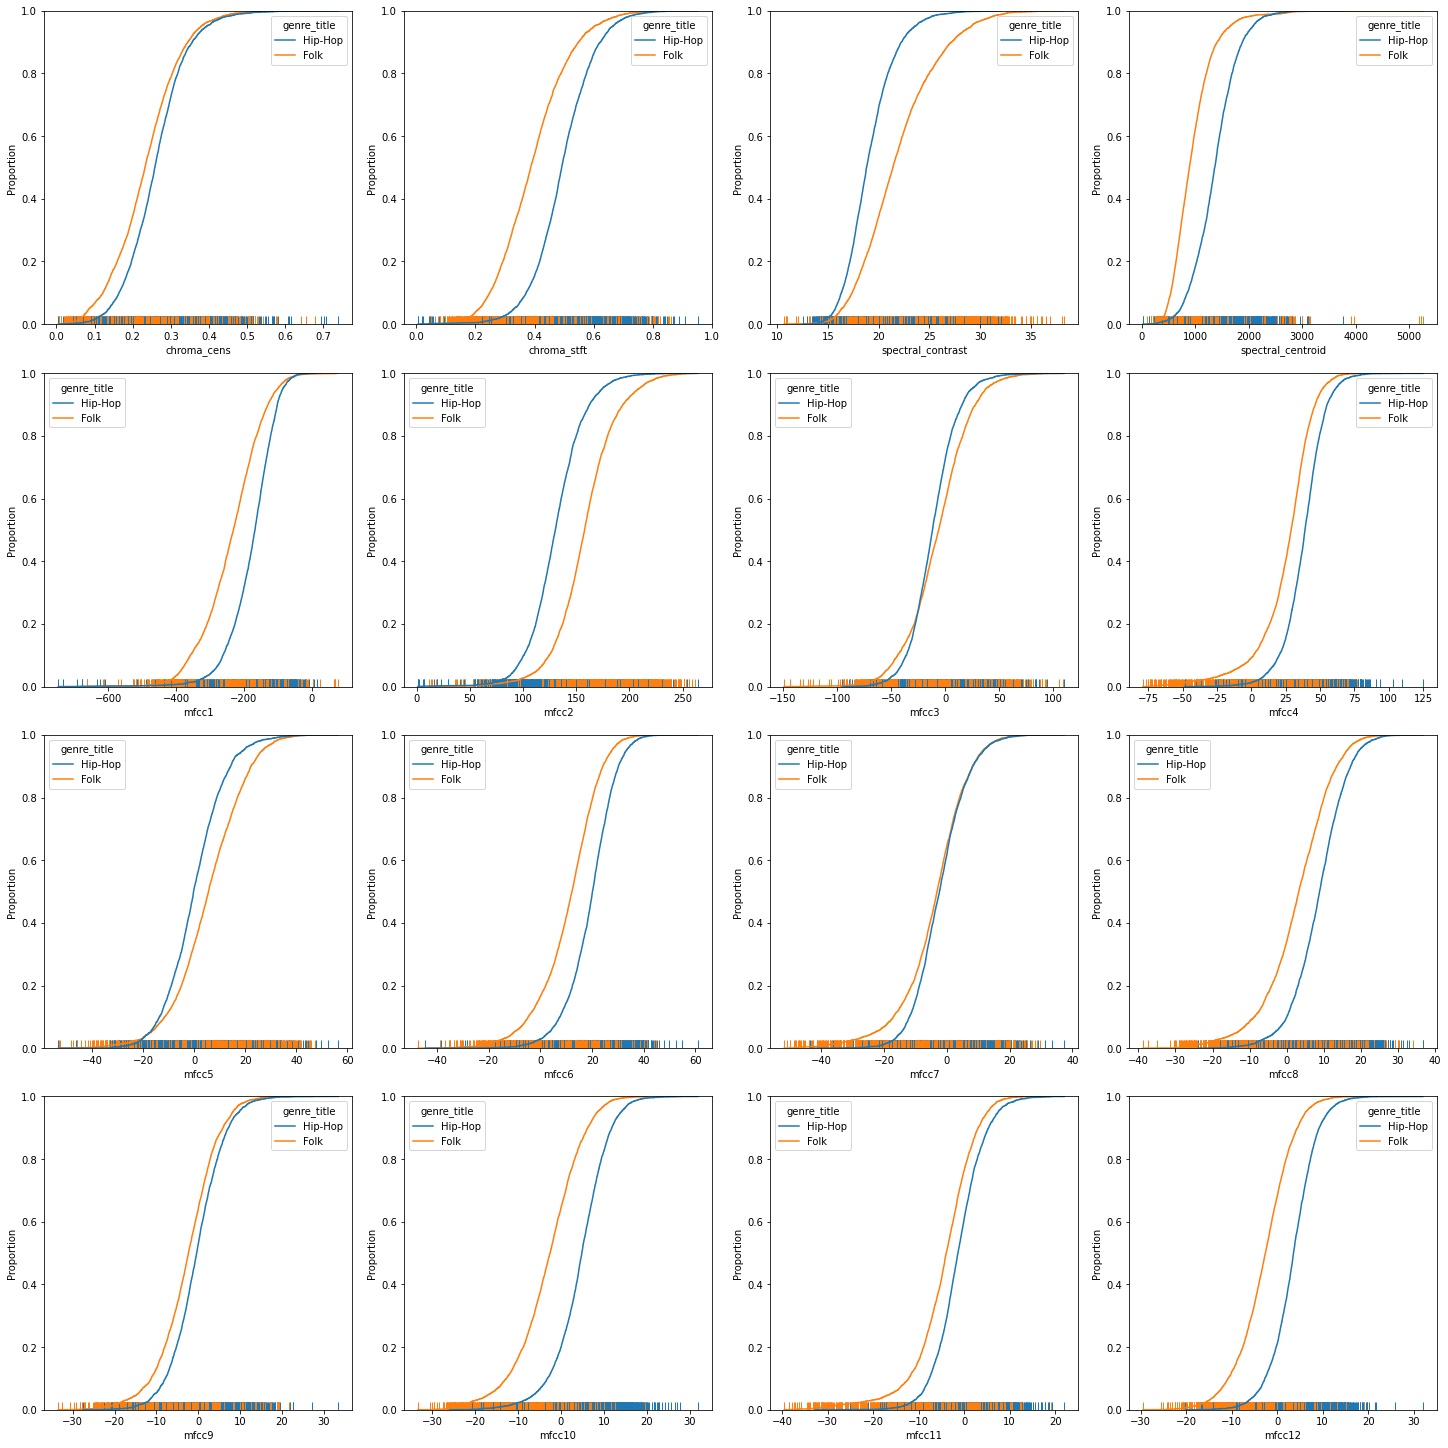

In [ ]:
featuresList = ['chroma_cens','chroma_stft','spectral_contrast','spectral_centroid','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12']
total_cols=4
total_rows=4
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for i,var in enumerate(featuresList):
  row=i // total_cols
  col=i % total_cols
  sns.ecdfplot(data=librosaSetA,x=var,hue="genre_title",ax=axes[row][col])
  sns.rugplot(data=librosaSetA,x=var,hue="genre_title",ax=axes[row][col])

In [ ]:
x=librosaSetA.drop(['genre_title'],axis=1)
y=librosaSetA.genre_title

Classification of genres(**Hip-Hop and Folk**) based on few librosa features:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

Accuracy of logistic regression classifier on test set: 0.83
F1Score of Logistic Regression:  0.8264732352415692


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.86
F1Score of Random Forest classifier  0.8581675342889064


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoost=GradientBoostingClassifier(loss="exponential",learning_rate=0.01, n_estimators=50, max_depth=10,random_state=42)
gradBoost.fit(x_train,y_train)
ypredGradBoost=gradBoost.predict(x_test)
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'.format(gradBoost.score(x_test, y_test)))
print('F1Score of Gradient Boosting classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Gradient Boosting Classifier on test set: 0.82
F1Score of Gradient Boosting classifier  0.8581675342889064


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgBoost= XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
scores_xgBoost=cross_val_score(xgBoost,x_train,y_train,cv=10,scoring="f1_micro")
print(scores_xgBoost)
print(scores_xgBoost.mean())

[0.84825493 0.84370258 0.83004552 0.81914894 0.8343465  0.82826748
 0.81155015 0.8100304  0.83282675 0.83282675]
0.8290999995387688


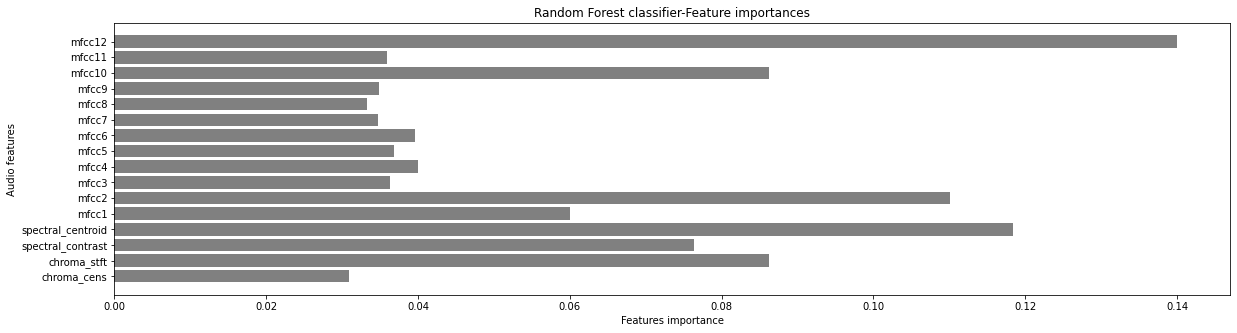

In [ ]:
importance=list(model.feature_importances_)
allfeatures=librosaSetA.drop('genre_title',axis=1)
features=list(allfeatures.columns)
fig = plt.figure(figsize = (20, 5)) 
plt.barh(features, importance, color ='grey') 
plt.title('Random Forest classifier-Feature importances')
plt.xlabel("Features importance") 
plt.ylabel("Audio features") 
plt.show() 

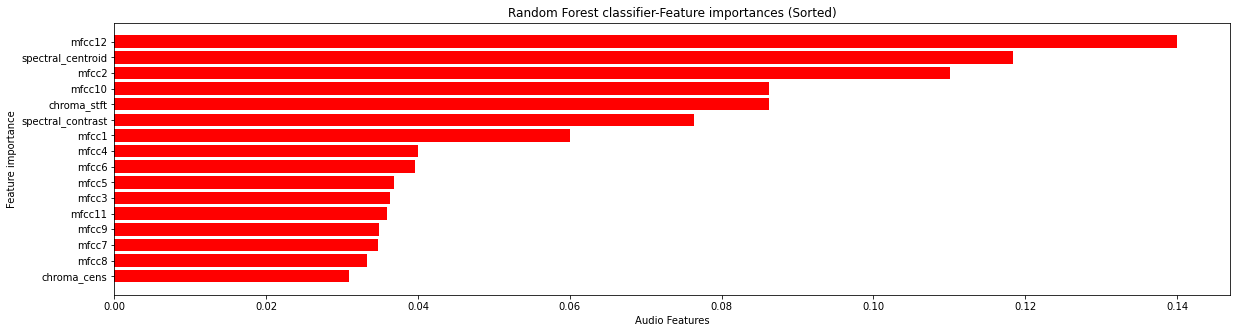

In [ ]:
zipped_lists=zip(importance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 5)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='red') 
plt.title('Random Forest classifier-Feature importances (Sorted)')
plt.ylabel("Feature importance") 
plt.xlabel("Audio Features") 
plt.show()